# Problem 4: 1-D Spins and the Ising Model
### Jakub Dawidowicz

One of the simplest models where we allow particle interaction is the Ising 1-D spin model, which can be used to predict macroscopic magnetic properties of solids made up of ions with a certain electron spin. We model the interacting spins aligned in a chain:
$$ --- \big\uparrow \big\uparrow \big\downarrow \big\downarrow \big\uparrow \big\uparrow\big\downarrow \big\uparrow \big\downarrow\big\downarrow --- $$

A spin may flip due to interactions with other atoms and in turn affect neighbouring spins until equilibrium is achieved.
If the electron interaction has magnitude $ J $, parallel spins have an energy $ -J $, antiparallel spins have energy $ -J $ and single spin flip may take values of $ -4J, 0 $ or $ +4J $:

$$ \big\uparrow \big\uparrow \big\uparrow  \Leftrightarrow \big\uparrow \big\downarrow \big\uparrow     \pm 4J $$
$$ \big\uparrow \big\uparrow \big\downarrow  \Leftrightarrow \big\uparrow \big\downarrow \big\downarrow  0J $$


### Task 1: Perform Monte Carlo Simulations to make plots for heat capacity vs temperature with J/k = 0.5K

Text(0.5, 1.0, 'Cv vs T for J/k = 0.5')

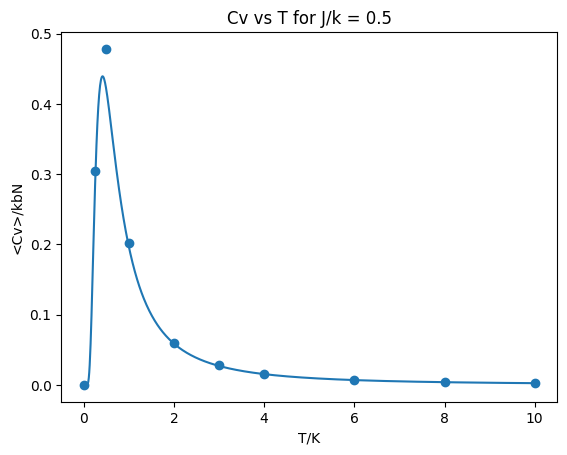

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import math
## Initial conditions
N = 500
L = N*2000
J = 0.5
k = 1.0

## Random ion function
def random(): 
    return np.random.randint(0,N)

## Main Monte Carlo calculation
def ising_MC(T):
    ## Initial distribution (all parallel)
    spin = -np.ones(N)

    P = np.exp(-4.0*J/(k*T))
    E = -J*N
    totE = 0
    totE2 = 0

    ## Main loop
    for num in range(L):
        i = np.random.randint(0,N)

        ## Create circular arrangement
        index1 = i+1
        if index1 == N :
            index1 = 0

        index2 = i-1
        if index2 < 0:
            index2 = N-1
        
        deltaE = 2 * J * spin[i] * (spin[index1]+spin[index2])

        ## Acceptance condition
        if deltaE <= 0 or np.random.rand() < P:
            spin[i] = -spin[i]
            E = E + deltaE
        totE = totE + E
        totE2 = totE2 + E**2
    
    ## Analysis
    avE = totE/L
    avE2 = totE2/L
    energyperspin = avE/N
    energy2perspin = avE2/N
    cv = 1/(k*T**2)*(avE2-avE**2)/N

    return cv, spin, avE

def cv_data():
    results = {
        'avE':[],
        'cv':[],
        't':[]
        }
    T = [0.001,0.25,0.5,1,2,3,4,6,8,10]
    for t in T:
        cv, spin, avE = ising_MC(t)
        ## Repeat calculation for peak, take average
        if t == J:
            for i in range(4):
                cv2, spin, avE = ising_MC(t)
                cv += cv2
            cv = cv/5
        results['avE'].append(avE)
        results['cv'].append(cv)
        results['t'].append(t)

    
    return (results)

def cv_analytical(T):
    return k * (2*J/(k*T)*(np.exp(J/(k*T))+np.exp(-J/(k*T)))**-1)**2

results = cv_data()
x=np.linspace(0.001,10,1000)
plt.scatter(results['t'],results['cv'])
plt.plot(x,cv_analytical(x))
plt.xlabel('T/K')
plt.ylabel('<Cv>/kbN')
plt.title('Cv vs T for J/k = 0.5K')

Text(0.5, 1.0, 'Cv vs T for J/k = 0.25')

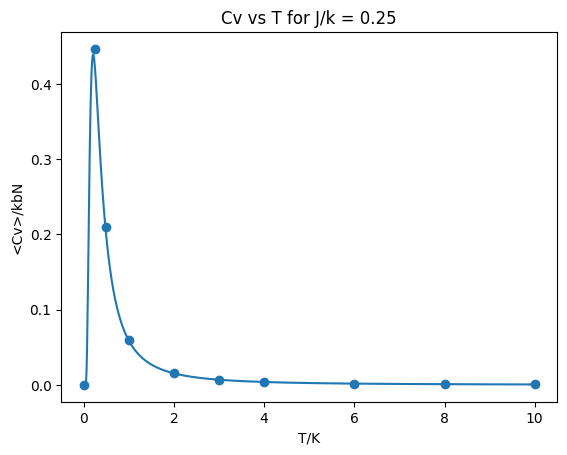

In [92]:
J = 0.25
results = cv_data()
plt.scatter(results['t'],results['cv'])
plt.plot(x,cv_analytical(x))
plt.xlabel('T/K')
plt.ylabel('<Cv>/kbN')
plt.title('Cv vs T for J/k = 0.25K')

/var/folders/9k/ymvm_q_s41xcn2jpwvn64gz80000gn/T/ipykernel_2069/1150483432.py:78: RuntimeWarning: overflow encountered in exp
  return k * (2*J/(k*T)*(np.exp(J/(k*T))+np.exp(-J/(k*T)))**-1)**2


Text(0.5, 1.0, 'Cv vs T for J/k = 2.0K')

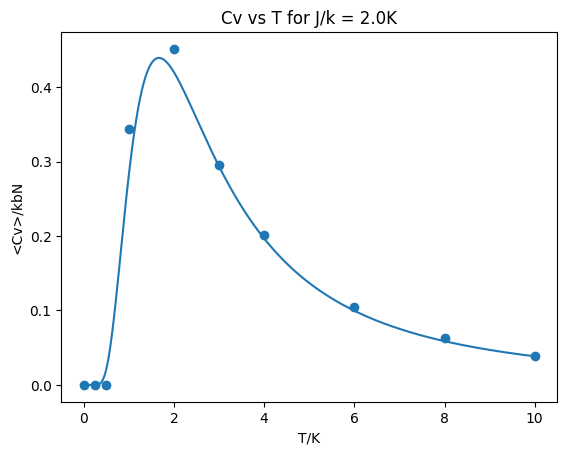

In [93]:
J = 2
results = cv_data()
plt.scatter(results['t'],results['cv'])
plt.plot(x,cv_analytical(x))
plt.xlabel('T/K')
plt.ylabel('<Cv>/kbN')
plt.title('Cv vs T for J/k = 2.0K')

The simulation appears to be successful, the data obtained from the Monte Carlo simulations is plotted with points, whereas the line on each graph represents the analytical solution, and they are nearly in line with each other. The peaks of the graphs are a little more inaccurate than the rest of the points, however to avoid this the simulation was repeated and an average taken for each peak.

We can also see that as the coupling energy decreases, the peak of the graph moves to lower temperatures, and the heat capacity varies much more rapidly with temperature. It increases faster as less thermal energy is required to overcome the parallel potential flip the spin of an electron, and decreases faster after the peak, as the overall energy the system can hold due to the potentials between the electrons, is lower.

### Task 2: Calculate the entropy for a given J value, and plot the results

Taking the entropy to be: $$ S = k\ln(\Omega) $$
where $$ \Omega = \frac{N!}{p!(N-p)!} $$
and $ p $ is the number if distinguishable groups in a sample size of $ N $.

Text(0.5, 1.0, 'Entropy vs T for J/k = 0.5')

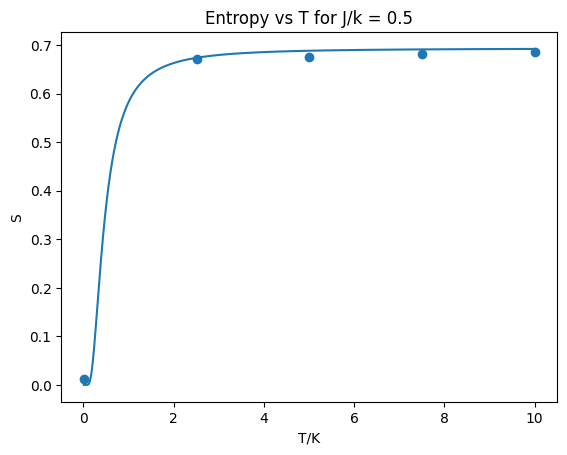

In [97]:
## Entropy
J = 0.5
def entropy(t):
    cv, spin, avE = ising_MC(t)
    groups = 1
    initial = spin[0]
    for i in range(len(spin)):
        if spin[i] != initial:
            groups+=1
            initial = -initial
    return k*np.log(math.factorial(N)/(math.factorial(groups)*math.factorial(N-groups)))/N

def entropy_analytical(t):
    return k*np.log(np.exp(2*J/(k*t))+1)-(2*J/t)*((np.exp(2*J/t))/(np.exp(2*J/t)+1))


e = []
temp = np.linspace(0.01,10,5)
for t in temp:
    e.append(entropy(t))

x=np.linspace(0.01,10,1000)
plt.scatter(temp,e)
plt.plot(x,entropy_analytical(x))
plt.xlabel('T/K')
plt.ylabel('S')
plt.title('Entropy vs T for J/k = 0.5')


/var/folders/9k/ymvm_q_s41xcn2jpwvn64gz80000gn/T/ipykernel_2069/2244995155.py:13: RuntimeWarning: overflow encountered in exp
  return k*np.log(np.exp(2*J/(k*t))+1)-(2*J/t)*((np.exp(2*J/t))/(np.exp(2*J/t)+1))
/var/folders/9k/ymvm_q_s41xcn2jpwvn64gz80000gn/T/ipykernel_2069/2244995155.py:13: RuntimeWarning: invalid value encountered in divide
  return k*np.log(np.exp(2*J/(k*t))+1)-(2*J/t)*((np.exp(2*J/t))/(np.exp(2*J/t)+1))


Text(0.5, 1.0, 'Entropy vs T for J/k = 10')

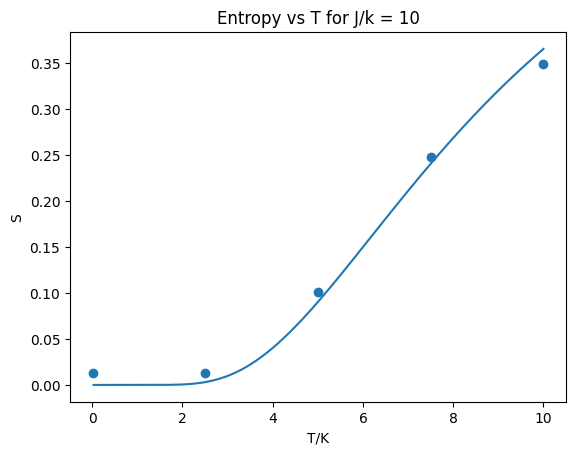

In [96]:
J = 10
e = []
temp = np.linspace(0.01,10,5)
for t in temp:
    e.append(entropy(t))

plt.scatter(temp,e)
plt.plot(x,entropy_analytical(x))
plt.xlabel('T/K')
plt.ylabel('S')
plt.title('Entropy vs T for J/k = 10')


The simulations agree with analytical solutions again. As temperature approaches 0, so does entropy, since there is no thermal energy to flip an electron to anti-parallel, all spins are parallel, and the system is at minimum disorder.

### Task 3: Einstein model for solids

When J = 0 and in the presence of a magnetic field B, $ Q_{N} $ becomes:
$$ Q_{N} = e^{\frac{mB\sum s_{k}}{kT}} $$

where the sum of $ s_{k} $ is the sum of all spins in the chain, and $ m $ is the magnetic moment.


### Self assessment:
I think this task sheet could have gone a lot better, the first and second part went well, got perfect results however I struggled to explain the entropy as it approaches infinity, I am not sure why entropy per spin is 0.7, and task 3 I know what I need to do for the derivation I'm just not sure how to do it, i.e incorporating the summation of all spins into an expression for Q which can be substituted into the different equations for Cv, S and U.